#Transfer learning

In [2]:
# this technique here we take a image classifcation and again train to pre-trained model
#pre-trained model-in this model ,we have to save the network that was previously trained on large dataset for performing image classification task.
#here we use pretrained model or customized the model

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



#data preprocessing

In [3]:
url= 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [4]:
unzip=  tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=True)

In [5]:
unzip

'/root/.keras/datasets/cats_and_dogs.zip'

In [6]:
unzip.index

<function str.index>

In [8]:
paths=os.path.join(os.path.dirname(unzip), 'cats_and_dogs_filtered')


In [9]:
train_dir =os.path.join(paths, 'train')

In [10]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

In [11]:
validation_dir =os.path.join(paths, 'validation')

In [12]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)


In [13]:
trained_datasets=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [14]:
validation_datasets = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


In [16]:
trained_datasets.class_names

['cats', 'dogs']

In [17]:
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [19]:
trained_datasets.take

<bound method DatasetV2.take of <BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>>

In [20]:
trained_datasets.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
trained_datasets.take(2)

<TakeDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
class_names=trained_datasets.class_names

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

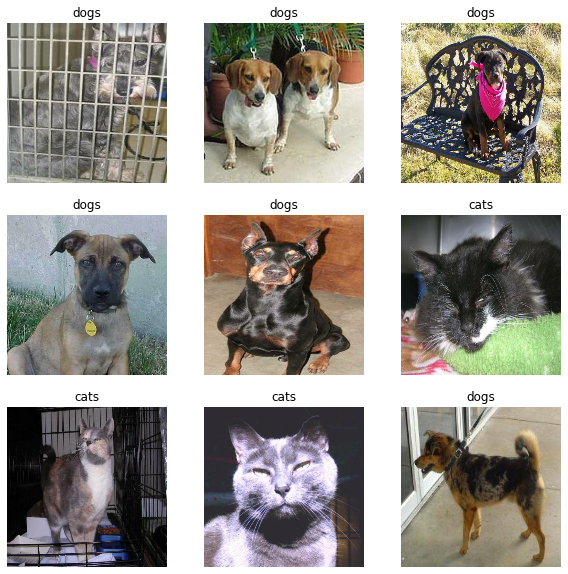

In [35]:
plt.figure(figsize=(10,10))
for images ,labels in trained_datasets.take(1):

  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

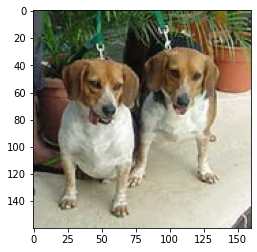

In [40]:
plt.imshow(images[1].numpy().astype('uint8'))

In [41]:
images[1]

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[ 71.425   ,  77.425   ,  76.2625  ],
        [ 75.916214,  81.80498 ,  82.13867 ],
        [ 80.0458  ,  85.0458  ,  88.0458  ],
        ...,
        [ 78.32295 , 106.32295 ,  65.32295 ],
        [ 82.45742 , 110.45742 ,  69.45742 ],
        [ 83.22627 , 111.22627 ,  70.22627 ]],

       [[ 72.01689 ,  77.01689 ,  80.785645],
        [ 76.49756 ,  81.49756 ,  85.46387 ],
        [ 81.36562 ,  86.36562 ,  90.87813 ],
        ...,
        [135.61836 , 161.61836 , 122.61836 ],
        [132.1545  , 158.1545  , 119.154495],
        [133.76622 , 159.76622 , 120.76621 ]],

       [[ 82.14795 ,  86.09375 ,  97.3501  ],
        [ 81.70947 ,  85.70947 ,  94.99072 ],
        [ 81.8125  ,  85.8125  ,  95.083496],
        ...,
        [ 66.433105,  90.18262 ,  54.433105],
        [ 68.02197 ,  91.81543 ,  56.021973],
        [ 70.09277 ,  93.930176,  58.092773]],

       ...,

       [[188.1875  , 189.1875  , 173.1875  ],
        [187.

In [42]:
images[1].numpy()

array([[[ 71.425   ,  77.425   ,  76.2625  ],
        [ 75.916214,  81.80498 ,  82.13867 ],
        [ 80.0458  ,  85.0458  ,  88.0458  ],
        ...,
        [ 78.32295 , 106.32295 ,  65.32295 ],
        [ 82.45742 , 110.45742 ,  69.45742 ],
        [ 83.22627 , 111.22627 ,  70.22627 ]],

       [[ 72.01689 ,  77.01689 ,  80.785645],
        [ 76.49756 ,  81.49756 ,  85.46387 ],
        [ 81.36562 ,  86.36562 ,  90.87813 ],
        ...,
        [135.61836 , 161.61836 , 122.61836 ],
        [132.1545  , 158.1545  , 119.154495],
        [133.76622 , 159.76622 , 120.76621 ]],

       [[ 82.14795 ,  86.09375 ,  97.3501  ],
        [ 81.70947 ,  85.70947 ,  94.99072 ],
        [ 81.8125  ,  85.8125  ,  95.083496],
        ...,
        [ 66.433105,  90.18262 ,  54.433105],
        [ 68.02197 ,  91.81543 ,  56.021973],
        [ 70.09277 ,  93.930176,  58.092773]],

       ...,

       [[188.1875  , 189.1875  , 173.1875  ],
        [187.65625 , 188.65625 , 172.65625 ],
        [183.07812 , 1

In [43]:
images[1].numpy().astype('uint8')

array([[[ 71,  77,  76],
        [ 75,  81,  82],
        [ 80,  85,  88],
        ...,
        [ 78, 106,  65],
        [ 82, 110,  69],
        [ 83, 111,  70]],

       [[ 72,  77,  80],
        [ 76,  81,  85],
        [ 81,  86,  90],
        ...,
        [135, 161, 122],
        [132, 158, 119],
        [133, 159, 120]],

       [[ 82,  86,  97],
        [ 81,  85,  94],
        [ 81,  85,  95],
        ...,
        [ 66,  90,  54],
        [ 68,  91,  56],
        [ 70,  93,  58]],

       ...,

       [[188, 189, 173],
        [187, 188, 172],
        [183, 184, 168],
        ...,
        [ 70,  74,  73],
        [ 96, 100,  98],
        [ 95,  99,  98]],

       [[186, 187, 171],
        [186, 187, 171],
        [181, 182, 166],
        ...,
        [ 70,  76,  74],
        [ 90,  96,  94],
        [ 79,  85,  83]],

       [[189, 190, 174],
        [189, 190, 174],
        [186, 187, 171],
        ...,
        [ 75,  81,  81],
        [ 79,  85,  85],
        [ 62,  68,  68]]

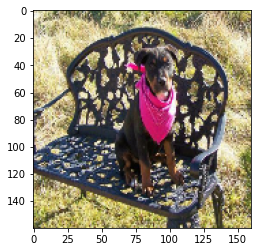

In [45]:
plt.imshow(images[2].numpy().astype('uint8'))

In [48]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [47]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


In [49]:
val_batches

<tf.Tensor: shape=(), dtype=int64, numpy=32>

In [52]:
test_dataset

<TakeDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
validation_dataset

<SkipDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
print("no of validation batches %d" % tf.data.experimental.cardinality(validation_dataset))

no of validation batches 26


In [61]:
print("no of test dataset %d" % tf.data.experimental.cardinality(test_dataset))

no of test dataset 6


#configuring the performances of datasets

In [65]:
AUTOTUNE = tf.data.AUTOTUNE

trained_datasets = trained_datasets.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [66]:
trained_datasets

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [67]:
validation_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [68]:
test_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [69]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

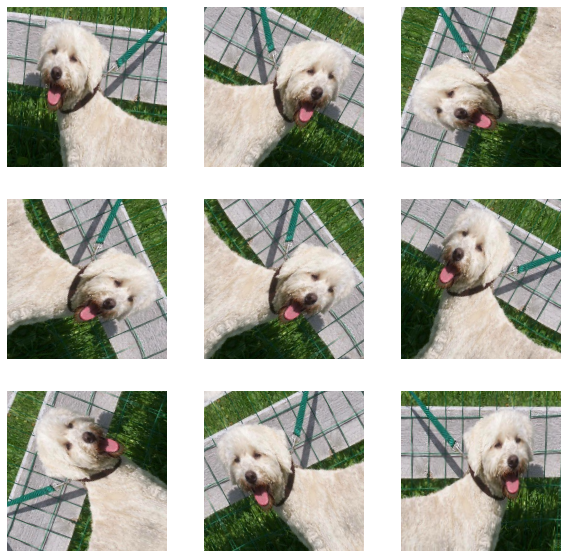

In [70]:
for image, _ in trained_datasets.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [71]:
#rescale pixel values
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [72]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [73]:
rescale

In [74]:
#create base model from pretrained model
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [75]:
#feature extractor allows us to covert 160x160x3 image into a 5x5x1280 block of features.

In [76]:
image_batch, label_batch = next(iter(trained_datasets))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


#extraction of feature

In [77]:
base_model.trainable = False

In [78]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [79]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()


In [80]:
global_average_layer

In [81]:
feature_batch_average = global_average_layer(feature_batch)

In [82]:
feature_batch_average

<tf.Tensor: shape=(32, 1280), dtype=float32, numpy=
array([[5.6023341e-01, 1.4432609e-03, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.9352360e-01],
       [1.7848082e+00, 9.4049647e-02, 1.2575343e+00, ..., 0.0000000e+00,
        2.2922065e+00, 0.0000000e+00],
       [0.0000000e+00, 1.5392488e-01, 5.2008802e-01, ..., 0.0000000e+00,
        4.5501115e-03, 1.0521073e+00],
       ...,
       [5.7294291e-01, 2.0545736e-01, 0.0000000e+00, ..., 0.0000000e+00,
        3.1980124e-01, 9.9781179e-01],
       [9.3679094e-01, 2.9570740e-01, 1.1419271e-03, ..., 0.0000000e+00,
        1.4034864e+00, 4.9413419e-01],
       [9.5114237e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.5376656e-01, 8.1171942e-01]], dtype=float32)>

In [83]:
print(feature_batch_average.shape)

(32, 1280)


In [84]:
prediction_layer = tf.keras.layers.Dense(1)

In [85]:
prediction_layer

In [86]:
prediction_batch = prediction_layer(feature_batch_average)

In [87]:
prediction_batch

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[ 1.0012898 ],
       [ 0.5440635 ],
       [ 0.33810657],
       [ 0.664588  ],
       [ 0.24880184],
       [-0.04702906],
       [-0.40619862],
       [ 0.24421856],
       [-0.8953968 ],
       [ 0.59266853],
       [ 1.7429582 ],
       [ 0.5419233 ],
       [-0.4136902 ],
       [ 0.23162012],
       [ 1.1564645 ],
       [ 0.21478784],
       [ 0.1472368 ],
       [ 0.5641459 ],
       [-0.2796474 ],
       [ 0.74390453],
       [-0.03631309],
       [-0.42734438],
       [ 0.02196431],
       [-1.1618637 ],
       [ 0.5068748 ],
       [ 1.2359515 ],
       [ 0.08340082],
       [ 0.44655076],
       [-0.17361385],
       [ 1.0843265 ],
       [ 0.06587484],
       [-0.43293363]], dtype=float32)>

In [88]:
print(prediction_batch.shape)

(32, 1)


In [94]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [90]:
inputs

<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_2')>

In [91]:
x

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'dropout')>

In [92]:
outputs

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>

In [93]:
model

COMPILE THE MODEL

In [95]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [96]:
#SUMMARIZE THE MODEL RECORDS
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [97]:
# LENGH OF TRAINABLE VARIABLE
len(model.trainable_variables)


2

TRAIN THE MODEL

In [101]:
initial_epochs = 20

loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 [==============================] - 1s 33ms/step - loss: 0.6795 - accuracy: 0.5891


In [102]:
print("initial loss: {:.2f}".format(loss0))

initial loss: 0.68


In [103]:
print("initial accuracy: {:.2f}".format(accuracy0))

initial accuracy: 0.59


In [104]:
history = model.fit(trained_datasets,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 10s 99ms/step - loss: 0.6366 - accuracy: 0.6185 - val_loss: 0.4764 - val_accuracy: 0.7673
Epoch 2/20
63/63 [==============================] - 5s 83ms/step - loss: 0.4891 - accuracy: 0.7450 - val_loss: 0.3380 - val_accuracy: 0.8663
Epoch 3/20
63/63 [==============================] - 5s 80ms/step - loss: 0.3910 - accuracy: 0.8000 - val_loss: 0.2705 - val_accuracy: 0.8899
Epoch 4/20
63/63 [==============================] - 5s 79ms/step - loss: 0.3490 - accuracy: 0.8360 - val_loss: 0.2268 - val_accuracy: 0.9183
Epoch 5/20
63/63 [==============================] - 5s 81ms/step - loss: 0.2942 - accuracy: 0.8650 - val_loss: 0.1905 - val_accuracy: 0.9356
Epoch 6/20
63/63 [==============================] - 5s 82ms/step - loss: 0.2723 - accuracy: 0.8800 - val_loss: 0.1721 - val_accuracy: 0.9381
Epoch 7/20
63/63 [==============================] - 5s 79ms/step - loss: 0.2466 - accuracy: 0.8930 - val_loss: 0.1552 - val_accuracy: 0.9394
Epoch 8/20
6

In [105]:
history

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [108]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [109]:
loss

[0.6366469264030457,
 0.489107221364975,
 0.3910430669784546,
 0.349030464887619,
 0.29417887330055237,
 0.27231210470199585,
 0.24663467705249786,
 0.24603897333145142,
 0.22602342069149017,
 0.20272210240364075,
 0.19456923007965088,
 0.19110319018363953,
 0.1928522288799286,
 0.17313235998153687,
 0.178108349442482,
 0.16888022422790527,
 0.16714556515216827,
 0.17073965072631836,
 0.15792058408260345,
 0.16198860108852386]

In [110]:
val_loss

[0.47637656331062317,
 0.3380429744720459,
 0.2705405652523041,
 0.22677648067474365,
 0.19049736857414246,
 0.1721121370792389,
 0.15521833300590515,
 0.14168448746204376,
 0.13335064053535461,
 0.11947232484817505,
 0.11028378456830978,
 0.10728254169225693,
 0.10241028666496277,
 0.10107631236314774,
 0.09824366867542267,
 0.0959242656826973,
 0.0842692106962204,
 0.08355850726366043,
 0.0881376564502716,
 0.08221820741891861]

Text(0.5, 1.0, 'Training and Validation Accuracy')

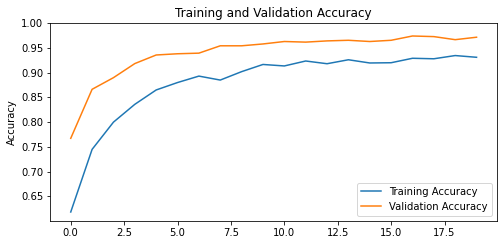

In [111]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

Text(0.5, 0, 'epoch')

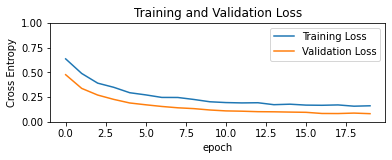

In [112]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

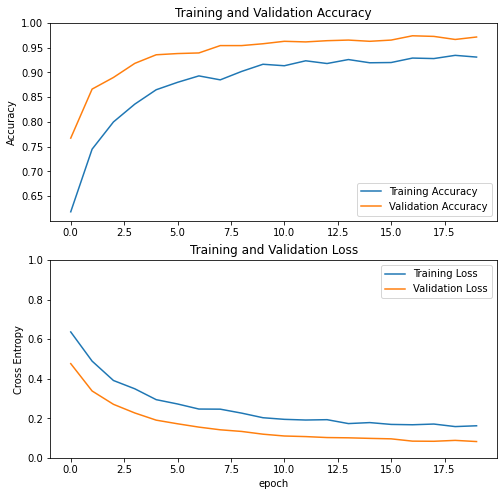

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

FINE TUNING OF DATASET

In [114]:
base_model.trainable = True

In [115]:
# NO OF LAYERS IN BASE ODEL.
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [116]:
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

COMPILE THE MODEL

In [117]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [118]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [119]:
len(model.trainable_variables)

56

#CONTINUE TRAIN THE MODEL

In [120]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(trained_datasets,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)
#after tuning the model on validation dataset ,it will get accuracy 98%

Epoch 20/30
63/63 [==============================] - 13s 104ms/step - loss: 0.1398 - accuracy: 0.9395 - val_loss: 0.0435 - val_accuracy: 0.9839
Epoch 21/30
63/63 [==============================] - 6s 91ms/step - loss: 0.1091 - accuracy: 0.9505 - val_loss: 0.0461 - val_accuracy: 0.9876
Epoch 22/30
63/63 [==============================] - 6s 93ms/step - loss: 0.0955 - accuracy: 0.9610 - val_loss: 0.0382 - val_accuracy: 0.9827
Epoch 23/30
63/63 [==============================] - 6s 89ms/step - loss: 0.0956 - accuracy: 0.9605 - val_loss: 0.0343 - val_accuracy: 0.9851
Epoch 24/30
63/63 [==============================] - 6s 92ms/step - loss: 0.0811 - accuracy: 0.9665 - val_loss: 0.0400 - val_accuracy: 0.9889
Epoch 25/30
63/63 [==============================] - 6s 93ms/step - loss: 0.0760 - accuracy: 0.9695 - val_loss: 0.0340 - val_accuracy: 0.9901
Epoch 26/30
63/63 [==============================] - 6s 91ms/step - loss: 0.0715 - accuracy: 0.9690 - val_loss: 0.0300 - val_accuracy: 0.9876
Epoc

In [121]:
history_fine

In [122]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

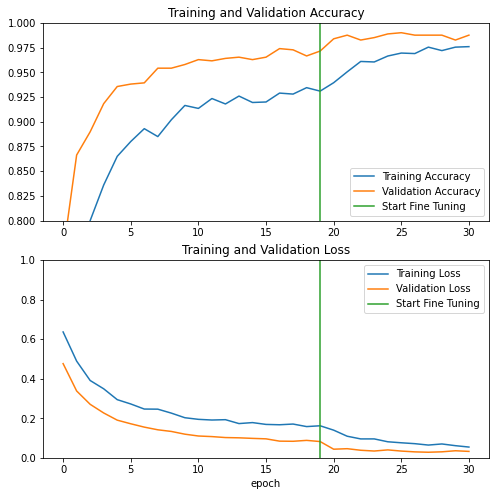

In [123]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#evaluation and prediction of the dataset

In [124]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

6/6 [==============================] - 1s 51ms/step - loss: 0.0250 - accuracy: 0.9948
Test accuracy : 0.9947916865348816


now you are ready to predict our model that is cat or dog

In [125]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

In [126]:
predictions

array([  7.847267 , -11.012355 ,   5.0752544,   7.9504695, -10.84483  ,
        -5.344065 ,   8.97004  ,  -5.9455233,   5.989644 ,   5.3879194,
       -12.406928 ,  -9.3667755, -10.513392 , -10.50082  ,  -9.086175 ,
        -6.6682277,  -8.545808 ,   8.306448 ,  11.842934 ,   1.1655171,
        -9.48033  ,   9.724787 ,   9.754937 ,   7.3286414, -10.862958 ,
       -10.162186 ,   6.794056 ,   7.0877295,  -7.950115 , -10.019313 ,
         8.548363 ,  -5.0010023], dtype=float32)

In [127]:

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)


In [128]:
predictions

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int32)>

In [129]:
print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)


Predictions:
 [1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0]
Labels:
 [1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0]


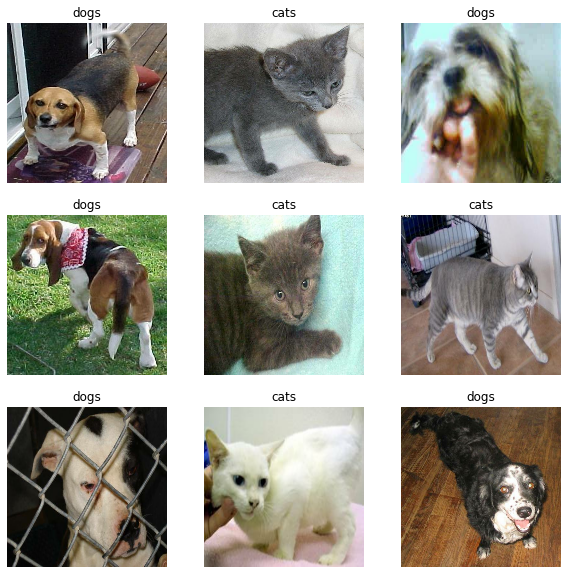

In [131]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

SUMMARY OR OBSERVATION

Using a pre-trained model for feature extraction: When working with a small dataset, it is a common practice to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training. In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.

Fine-tuning a pre-trained model: To further improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning. In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the original dataset that the pre-trained model was trained on.